In [86]:
import numpy as np
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Load MNIST

In [8]:
MNIST_MEAN = 0.1307
MNIST_STD = 0.3081

transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((MNIST_MEAN,), (MNIST_STD,))
    ])

train_dataset = MNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='../data', train=False, download=True, transform=transform)

# Show Image Function

In [183]:
def show_image(image, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray_r')
    plt.title(title)
    plt.axis('off')

# Train and Test data

In [188]:
X_train = np.array(train_dataset.data).reshape(-1, 28 * 28)[:1000]
y_train = np.array(train_dataset.targets)[:1000]
X_test =  np.array(test_dataset.data).reshape(-1, 28 * 28)[:100]
y_test = np.array(test_dataset.targets)[:100]

In [189]:
digits, counts = np.unique(y_train, return_counts=True)
print("Digit   Count(train data)")
print("-----   -----------------")
for digit, count in zip(digits, counts):
    print(f"{digit:<8}{count}")

Digit   Count(train data)
-----   -----------------
0       97
1       116
2       99
3       93
4       105
5       92
6       94
7       117
8       87
9       100


# Kernel: Linear

In [190]:
param_grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 0.01, 0.1, 1, 10]
}

svm = SVC(kernel='linear')

grid_search_linear = GridSearchCV(svm, param_grid, cv=5)

grid_search_linear.fit(X_train, y_train)

print(f"Best Score: {grid_search_linear.best_score_:.2f}")
print(f"Best Parameters: {grid_search_linear.best_params_}")

Best Score: 0.88
Best Parameters: {'C': 1e-06}


# Kernel: RBF

In [125]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

svm = SVC(kernel='rbf')

grid_search_rbf = GridSearchCV(svm, param_grid, cv=5)

grid_search_rbf.fit(X_train, y_train)

print(f"Best Score: {grid_search_rbf.best_score_:.2f}")
print(f"Best Parameters: {grid_search_rbf.best_params_}")

Best Score: 0.91
Best Parameters: {'C': 10, 'gamma': 'scale'}


# Kernel: Polynomial Degree 2

In [126]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

svm = SVC(kernel='poly', degree=2)

grid_search_poly = GridSearchCV(svm, param_grid, cv=5)

grid_search_poly.fit(X_train, y_train)


print(f"Best Score: {grid_search_poly.best_score_:.2f}")
print(f"Best Parameters: {grid_search_poly.best_params_}")

Best Score: 0.89
Best Parameters: {'C': 10, 'gamma': 'scale'}


# Best SVM

In [151]:
best_svm = grid_search_rbf.best_estimator_

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Best Parameters: {grid_search_rbf.best_params_}")
print(f"SVM Train Accuracy: {train_accuracy:.2f}")
print(f"SVM Test Accuracy:  {test_accuracy:.2f}")

Best Parameters: {'C': 10, 'gamma': 'scale'}
SVM Train Accuracy: 1.00
SVM Test Accuracy:  0.94


# SVM  VS.  Logistic Regression

In [152]:
logistic = LogisticRegression(max_iter=300)
logistic.fit(X_train, y_train)
logistic_y_pred = logistic.predict(X_test)
lr_accuracy = accuracy_score(y_test, logistic_y_pred)
print(f"Logistic Regression Test Accuracy: {lr_accuracy:.2f}")

Logistic Regression Test Accuracy: 0.90


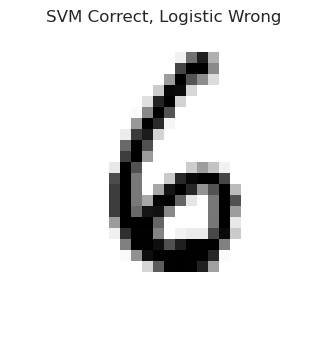

In [184]:
np.random.seed(31)
svm_pred = y_test_pred
logistic_pred = logistic_y_pred
svm_correct_logistic_wrong = X_test[(svm_pred == y_test) & (logistic_pred == y_test)]
index = np.random.randint(0, len(svm_correct_logistic_wrong))
image = svm_correct_logistic_wrong[index]


show_image(image.reshape((28, 28, 1)), "SVM Correct, Logistic Wrong")
plt.savefig("../assets/Q6.png")
plt.show()
